In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

# CIFAR-10

In [1]:
# CIFAR-10
senn = 
enn = pd.read_csv("../eval/edit_success_20210510.00.05.1620630224_finetune_epoch24_ts9999.20210509.23.05.1620626982")
base = pd.read_csv("../eval/edit_success_20210509.13.05.1620592304_finetune_epoch199_ts9999.20210429.19.04.1619750982")

NameError: name 'pd' is not defined

## Edit success

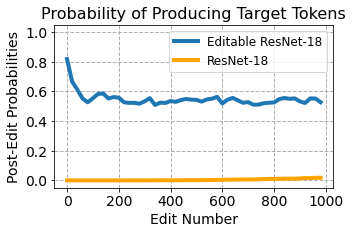

In [19]:
enn['grouping'] = (
    enn
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
ax=(
    enn
    .query('edit_step == 5')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4,
        label="Editable ResNet-18"
    )
)


base['grouping'] = (
    base
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    base
    .query('edit_step == 5')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        color='orange', figsize=(5,3), linewidth=4,
        label="ResNet-18", ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Post-Edit Probabilities", fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.05, 1.05)
plt.title("Probability of Producing Target Tokens", fontsize=16)
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)
plt.savefig('edit_success.png', bbox_inches='tight', facecolor="#ffffff")

## Accuracy

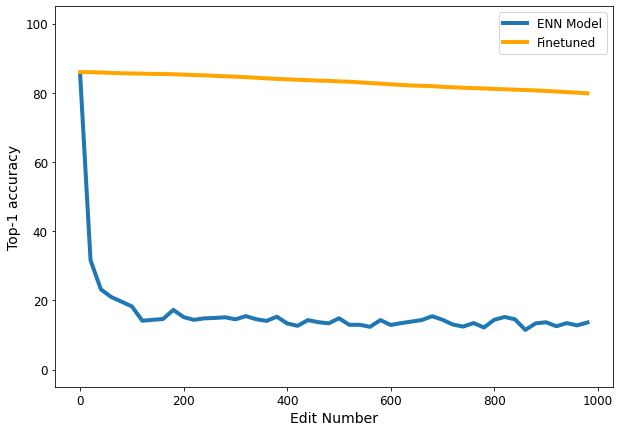

In [23]:
ax = (
   enn.loc[~enn.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1", 
        figsize=(10,7), linewidth=4, 
        label="ENN Model"
    )
)

(
    base.loc[~base.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        color='orange', linewidth=4, 
        label='Finetuned', ax=ax
    )
)
plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-1 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(-5, 105)
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('cifar_resnet_acc1.png', bbox_inches='tight', facecolor="#ffffff")

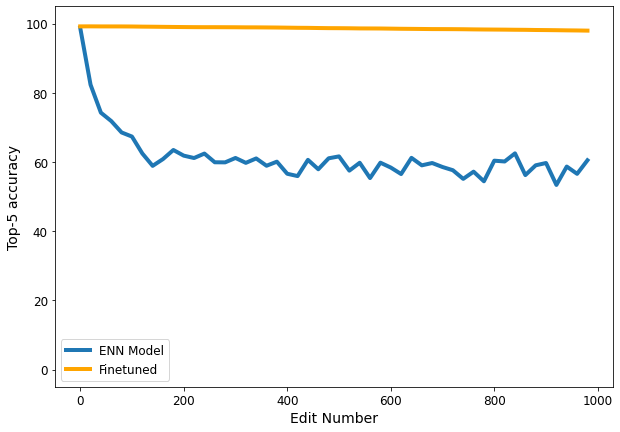

In [17]:
ax = (
   enn.loc[~enn.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='line', x="edit_number",y="new_acc5", 
        figsize=(10,7), linewidth=4,
        label="ENN Model"
    )
)

(
    base.loc[~base.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='line', x="edit_number",y="new_acc5",
        color='orange', linewidth=4,
        label='Finetuned', ax=ax
    )
)
plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-5 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(-5, 105)
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('cifar_resnet_acc5.png', bbox_inches='tight', facecolor="#ffffff")

## L2 distance

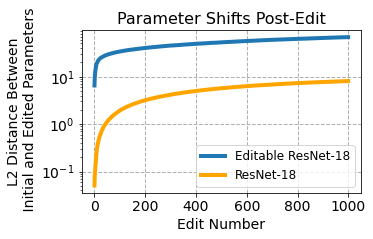

In [16]:
(
    enn
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(label="Editable ResNet-18", figsize=(5,3), linewidth=4)
)


(
    base
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(color='orange', label="ResNet-18", linewidth=4)
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("L2 Distance Between\n Initial and Edited Parameters", fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log")
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)
plt.title("Parameter Shifts Post-Edit", fontsize=16)
plt.savefig('l2_distance.png', bbox_inches='tight', facecolor="#ffffff")

# ImageNet

## Edit success

In [26]:
# ImageNet
model_100 = pd.read_csv("../eval/edit_success_20210506.13.05.1620331667_resnet18_pretrained")
gpt_100 = pd.read_csv("../eval/edit_success_20210506.19.05.1620353686_resnet18_epoch1_ts20000.20210504.00.05.1620113071")

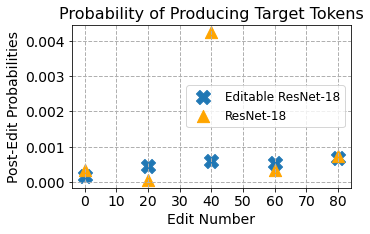

In [27]:
model_100['grouping'] = (
    model_100
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
ax=(
    model_100
    .query('edit_step == 1')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='scatter', x="grouping",y="log_prob", 
        marker="X", s=200, figsize=(10,7),
        label="Editable ResNet-18"
    )
)


gpt_100['grouping'] = (
    gpt_100
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    gpt_100
    .query('edit_step == 1')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='scatter', x="grouping",y="log_prob", 
        color='orange', marker="^", s=150, figsize=(5,3),
        label="ResNet-18", ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Post-Edit Probabilities", fontsize=14)
plt.yticks(fontsize=14)
# plt.ylim(-0.01,0.16)
plt.title("Probability of Producing Target Tokens", fontsize=16)
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)
plt.savefig('edit_success.png', bbox_inches='tight', facecolor="#ffffff")

## Accuracy

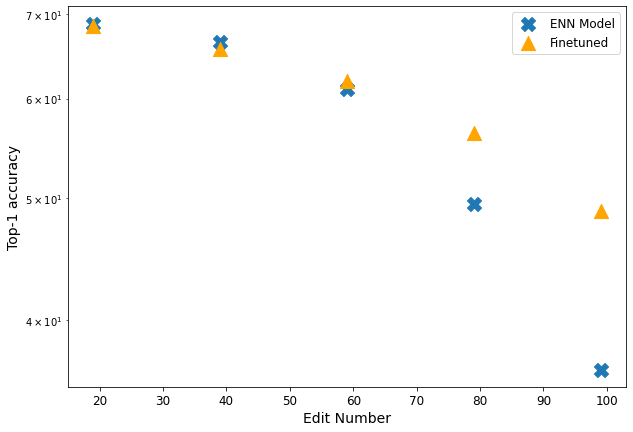

In [28]:
ax = (
   model_100.loc[~model_100.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc1", 
        marker="X", s=200, figsize=(10,7),
        label="ENN Model"
    )
)

(
    gpt_100.loc[~gpt_100.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc1",
        color='orange', marker="^", s=200, 
        label='Finetuned', ax=ax
    )
)
plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-1 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.yscale("log")
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('perplexity.png', bbox_inches='tight', facecolor="#ffffff")

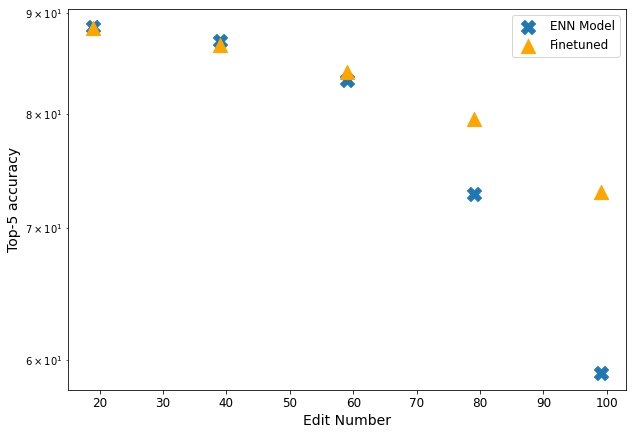

In [29]:
ax = (
   model_100.loc[~model_100.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc5", 
        marker="X", s=200, figsize=(10,7),
        label="ENN Model"
    )
)

(
    gpt_100.loc[~gpt_100.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc5",
        color='orange', marker="^", s=200, 
        label='Finetuned', ax=ax
    )
)
plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-5 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.yscale("log")
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('perplexity.png', bbox_inches='tight', facecolor="#ffffff")

## L2 distance

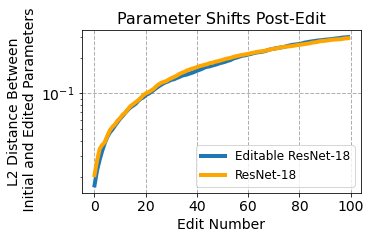

In [30]:
(
    model_100
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(label="Editable ResNet-18", figsize=(5,3), linewidth=4)
)


(
    gpt_100
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(color='orange', label="ResNet-18", linewidth=4)
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("L2 Distance Between\n Initial and Edited Parameters", fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log")
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)
plt.title("Parameter Shifts Post-Edit", fontsize=16)
plt.savefig('l2_distance.png', bbox_inches='tight', facecolor="#ffffff")